# Sea Surface Temperature Prediction

In [2]:
# Import All the Necessary Libraries

import pandas as pd
import numpy as np

# Preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Libraries for Model development
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [3]:
# Import the dataset

data = pd.read_csv('new_output.csv')

In [4]:
# Display the first few rows of the data
print(data.head())

         Time  Latitude  Longitude        SST
0  2013-01-01    10.625     55.125  26.480000
1  2013-01-01    16.625     59.875  25.380000
2  2013-01-01    19.625     69.375  26.640000
3  2013-01-01    16.625     59.625  25.400000
4  2013-01-01    18.875     57.625  25.189999


In [5]:
# Convert Time into "year"
data['year'] = pd.to_datetime(data['Time']).dt.year

# Convert Time into "month"
data['month'] = pd.to_datetime(data['Time']).dt.month

# Convert Time into "day"
data['day'] = pd.to_datetime(data['Time']).dt.day

In [6]:
# Print the modified data

print((data))

              Time  Latitude  Longitude        SST  year  month  day
0       2013-01-01    10.625     55.125  26.480000  2013      1    1
1       2013-01-01    16.625     59.875  25.380000  2013      1    1
2       2013-01-01    19.625     69.375  26.640000  2013      1    1
3       2013-01-01    16.625     59.625  25.400000  2013      1    1
4       2013-01-01    18.875     57.625  25.189999  2013      1    1
...            ...       ...        ...        ...   ...    ...  ...
781795  2023-09-14    19.875     64.375  29.140000  2023      9   14
781796  2023-09-14    10.625     69.375  29.160000  2023      9   14
781797  2023-09-14    18.625     61.625  28.150000  2023      9   14
781798  2023-09-14    12.625     69.875  28.720000  2023      9   14
781799  2023-09-14    22.625     63.125  28.330000  2023      9   14

[781800 rows x 7 columns]


In [7]:
# Scale  ()'Longitude', 'Latitude', 'year', 'month', 'day') of the data

scaler = MinMaxScaler()
data[[ 'Longitude', 'Latitude', 'year', 'month', 'day']] = scaler.fit_transform(data[['Longitude', 'Latitude', 'year', 'month', 'day']])

In [8]:
# Create sequence

def create_sequences(data, target, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = target[i + sequence_length]
        X.append(seq)
        y.append(label)
    return np.array(X), np.array(y)

# Give the sequence length according to the mode of prediction

sequence_length = 10 # adjust based on your model's requirements
features = ['Longitude', 'Latitude', 'year', 'month', 'day']
X, y = create_sequences(data[features].values, data['SST'].values, sequence_length)

In [9]:
# Reshape the X file.

X= X.reshape((X.shape[0], X.shape[1], len(features)))

In [10]:
# Convert X and Y into test and train data respectively.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = Sequential()
# LSTM layer
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
# Dense layer for regression
model.add(Dense(units=1, activation='linear'))  # 'linear' activation for regression

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Fit the model with the training set

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
19545/19545 [==============================] - 104s 5ms/step - loss: 5.6728
Epoch 2/50
19545/19545 [==============================] - 95s 5ms/step - loss: 1.7867
Epoch 3/50
19545/19545 [==============================] - 92s 5ms/step - loss: 1.7566
Epoch 4/50
19545/19545 [==============================] - 92s 5ms/step - loss: 1.7387
Epoch 5/50
19545/19545 [==============================] - 117s 6ms/step - loss: 1.7316
Epoch 6/50
19545/19545 [==============================] - 112s 6ms/step - loss: 1.7267
Epoch 7/50
19545/19545 [==============================] - 118s 6ms/step - loss: 1.7206
Epoch 8/50
19545/19545 [==============================] - 120s 6ms/step - loss: 1.7123
Epoch 9/50
19545/19545 [==============================] - 119s 6ms/step - loss: 1.7049
Epoch 10/50
19545/19545 [==============================] - 123s 6ms/step - loss: 1.6986
Epoch 11/50
19545/19545 [==============================] - 119s 6ms/step - loss: 1.6879
Epoch 12/50
19545/19545 [===================

In [18]:
# Predict the Model

predicted_sst = model.predict(X_test)

4887/4887 [==============================] - 16s 3ms/step


In [19]:
# Import the Library for finding Mean squared error

from sklearn.metrics import mean_squared_error

y_true = y_test# Actual labels from the test set
y_pred = predicted_sst # Predicted labels from the model


# Find the Mean squared error

mse = mean_squared_error(y_true, predicted_sst)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.6313688771836645


In [20]:
# Check the places where the prediction deviates much from true value.

no_of_test=2444
count=0
non_count=0
for i in range(no_of_test):
    if (predicted_sst[i][0]-y_test[i])**2<=5**2:
        count=count+1
        
    else:
        non_count=non_count+1
        
print(count)
print(non_count)



2432
12


In [21]:
# Find difference between one of the predicted value and test value

print(predicted_sst[i][0], y_test[i])

29.944935 30.15


In [22]:
# Find the difference between predicted value and tested value.

for i in range(len(y_test)):
    print(y_test[i], predicted_sst[i][0])


30.189999 30.056122
26.99 27.120008
23.68 26.709978
28.65 27.952002
25.72 25.488031
25.849998 26.020084
26.47 26.802221
24.529999 25.281456
26.769999 26.798252
26.5 26.226295
27.619999 27.399654
27.439999 28.146511
29.15 27.992296
24.529999 25.534292
28.16 29.480612
28.279999 27.974266
28.23 29.010494
29.429998 29.980131
30.26 30.412762
29.31 28.565516
25.92 25.823168
28.369999 27.929932
28.4 28.496407
26.019999 25.022684
27.949999 26.711224
25.14 26.990479
19.21 24.722185
30.529999 30.239637
28.5 28.586384
27.65 27.33897
25.74 25.530678
26.619999 26.316757
27.34 26.778406
27.71 27.462904
26.92 27.390865
29.859999 29.939526
28.98 29.001717
27.92 28.139164
30.4 29.151638
25.88 26.494646
27.59 25.045784
30.49 29.909748
29.619999 28.47678
27.24 27.787704
24.689999 26.041515
31.06 28.795755
28.82 28.561699
27.4 27.754068
28.099998 27.225254
26.56 27.067074
28.91 28.858309
25.64 28.039383
28.289999 28.300566
26.18 25.122776
26.779999 26.450836
28.57 28.255192
24.84 26.382584
27.099998 26.23

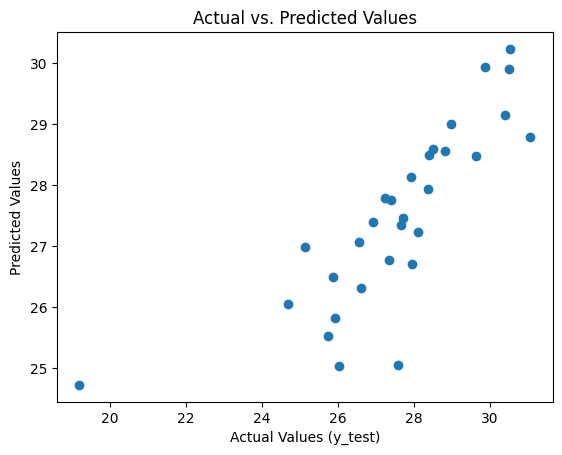

In [23]:
# Make a scatter plot between y_test and predicted sst

import matplotlib.pyplot as plt


plt.scatter(y_test[20:50], y_pred[20:50])
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()
